# Полносвязная сеть на Cifar10

В этом задании мы попробуем применить несколько моделей на датасете cifar10 и понять, какие из них лучше

## Загрузим данные

In [1]:
import keras
import numpy as np

from keras.datasets import cifar10
from keras.utils import np_utils

from keras.layers import Dense, Dropout
from keras.layers.core import Activation
from keras.models import Sequential

import matplotlib.pyplot as plt

Using TensorFlow backend.


Для воспроизводимости расчетов воспользуемся стандартным разбиением на обучающую и тестовую выборки

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 48s 0us/step


Смотрим на данные глазами

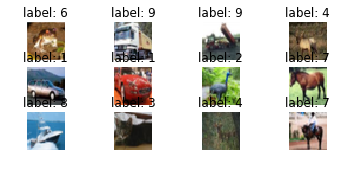

In [3]:
images_and_labels = list(zip(x_train,  y_train))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' % label )

Преобразуем их в подходящем нас в виде

In [4]:
x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

50000 train samples
10000 test samples


# Построим модель для обучения

Напишем функцию, которая возвращает качество у сети с заданной структурой 

In [0]:
def get_accuracy_on_deep_model(layers, data, batch_size=128, epochs=10):

    """

    Функция создает модель с несколькими скрытыми слояи (количество вершин каждого слоя
    указано в массиве layers). Каждый слой (кроме последнего, на 10 выходов)
    сопровождается дропаутом с долей удаленных ребер 0.2

    Модель обучается на данных data с гиперпараметрами batch_size и epochs.

    Для функции активации используйте relu, на последнем слое используйте softmax.

    Функция возвращает качество на тестовое выборке в последней эпохе.

    :param layers: массив, каждый элемент равен количеству вершин на слое.
    :param data: кортеж, (x_train, y_train, x_test, y_test)
    :param batch_size: размер батча (берем по дефолту)
    :param epochs: количество эпох (берем по дефолту)
    :return: финальное качество на тестовой выборке.
    """

    x_train, y_train, x_test, y_test = data

    model = Sequential()

    # добавляем первый слой
    model.add(Dense(layers[0], activation='relu', input_shape=x_train.shape[1:]))
    model.add(Dropout(0.2))

    # с помощью цикла добавляем остальные слои
    for layer in layers[1:]:
        model.add(Dense(layer, activation='relu'))
        model.add(Dropout(0.2))

    # добавляем последний слой
    model.add(Dense(10, activation='softmax'))

    # компилируем модель
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # обучаемся
    history = model.fit(x_train, y_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       validation_data=(x_test, y_test))


    # возвращаем только последнее значение на валидационной выборке
    return history.history["acc"][-1]

Посмотрим качество с двумя скрытыми слоями

In [0]:
data = x_train, y_train, x_test, y_test

In [13]:
get_accuracy_on_deep_model([150,512], data)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 44us/step - loss: 1.9570 - acc: 0.2785 - val_loss: 1.7825 - val_acc: 0.3708
Epoch 2/10
50000/50000 [==============================] - 2s 36us/step - loss: 1.8299 - acc: 0.3329 - val_loss: 1.7164 - val_acc: 0.3847
Epoch 3/10
50000/50000 [==============================] - 2s 35us/step - loss: 1.7731 - acc: 0.3584 - val_loss: 1.6682 - val_acc: 0.4094
Epoch 4/10
50000/50000 [==============================] - 2s 36us/step - loss: 1.7423 - acc: 0.3698 - val_loss: 1.6671 - val_acc: 0.3884
Epoch 5/10
50000/50000 [==============================] - 2s 35us/step - loss: 1.7267 - acc: 0.3758 - val_loss: 1.6492 - val_acc: 0.4116
Epoch 6/10
50000/50000 [==============================] - 2s 36us/step - loss: 1.6985 - acc: 0.3868 - val_loss: 1.6275 - val_acc: 0.4210
Epoch 7/10
50000/50000 [==============================] - 2s 35us/step - loss: 1.6873 - acc: 0.3890 - val_loss: 1.6121 - val_acc

0.39887999999046325

In [14]:
get_accuracy_on_deep_model([700,150], data)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 53us/step - loss: 2.0256 - acc: 0.2596 - val_loss: 1.8322 - val_acc: 0.3509
Epoch 2/10
50000/50000 [==============================] - 2s 45us/step - loss: 1.8379 - acc: 0.3359 - val_loss: 1.7176 - val_acc: 0.3943
Epoch 3/10
50000/50000 [==============================] - 2s 45us/step - loss: 1.7649 - acc: 0.3667 - val_loss: 1.6598 - val_acc: 0.4183
Epoch 4/10
50000/50000 [==============================] - 2s 45us/step - loss: 1.7154 - acc: 0.3851 - val_loss: 1.6223 - val_acc: 0.4273
Epoch 5/10
50000/50000 [==============================] - 2s 44us/step - loss: 1.6713 - acc: 0.3988 - val_loss: 1.6059 - val_acc: 0.4272
Epoch 6/10
50000/50000 [==============================] - 2s 44us/step - loss: 1.6478 - acc: 0.4083 - val_loss: 1.5892 - val_acc: 0.4355
Epoch 7/10
50000/50000 [==============================] - 2s 44us/step - loss: 1.6248 - acc: 0.4154 - val_loss: 1.5737 - val_acc

0.4328999999809265

In [15]:
get_accuracy_on_deep_model([150,700], data)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 44us/step - loss: 1.9709 - acc: 0.2740 - val_loss: 1.8087 - val_acc: 0.3528
Epoch 2/10
50000/50000 [==============================] - 2s 36us/step - loss: 1.8506 - acc: 0.3228 - val_loss: 1.7383 - val_acc: 0.3750
Epoch 3/10
50000/50000 [==============================] - 2s 37us/step - loss: 1.7986 - acc: 0.3437 - val_loss: 1.7232 - val_acc: 0.3872
Epoch 4/10
50000/50000 [==============================] - 2s 41us/step - loss: 1.7730 - acc: 0.3532 - val_loss: 1.6790 - val_acc: 0.4004
Epoch 5/10
50000/50000 [==============================] - 2s 41us/step - loss: 1.7475 - acc: 0.3649 - val_loss: 1.6611 - val_acc: 0.4019
Epoch 6/10
50000/50000 [==============================] - 2s 41us/step - loss: 1.7301 - acc: 0.3728 - val_loss: 1.6548 - val_acc: 0.4094
Epoch 7/10
50000/50000 [==============================] - 2s 41us/step - loss: 1.7085 - acc: 0.3784 - val_loss: 1.6406 - val_acc

0.39044

Посмотрим качество с тремя скрытыми слоями

In [16]:
get_accuracy_on_deep_model([100,100,100], data)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 57us/step - loss: 2.0550 - acc: 0.2317 - val_loss: 1.8784 - val_acc: 0.3209
Epoch 2/10
50000/50000 [==============================] - 2s 44us/step - loss: 1.9345 - acc: 0.2808 - val_loss: 1.8431 - val_acc: 0.3391
Epoch 3/10
50000/50000 [==============================] - 2s 44us/step - loss: 1.9008 - acc: 0.2979 - val_loss: 1.8102 - val_acc: 0.3517
Epoch 4/10
50000/50000 [==============================] - 2s 44us/step - loss: 1.8844 - acc: 0.3076 - val_loss: 1.8370 - val_acc: 0.3318
Epoch 5/10
50000/50000 [==============================] - 2s 43us/step - loss: 1.8780 - acc: 0.3102 - val_loss: 1.7960 - val_acc: 0.3463
Epoch 6/10
50000/50000 [==============================] - 2s 38us/step - loss: 1.8628 - acc: 0.3181 - val_loss: 1.7650 - val_acc: 0.3779
Epoch 7/10
50000/50000 [==============================] - 2s 38us/step - loss: 1.8569 - acc: 0.3228 - val_loss: 1.7958 - val_acc

0.3319400000095367

In [17]:
get_accuracy_on_deep_model([30,150,30], data)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 49us/step - loss: 2.1463 - acc: 0.1814 - val_loss: 1.9965 - val_acc: 0.2351
Epoch 2/10
50000/50000 [==============================] - 2s 38us/step - loss: 2.0691 - acc: 0.2030 - val_loss: 1.9903 - val_acc: 0.2332
Epoch 3/10
50000/50000 [==============================] - 2s 37us/step - loss: 2.0474 - acc: 0.2158 - val_loss: 1.9675 - val_acc: 0.2497
Epoch 4/10
50000/50000 [==============================] - 2s 38us/step - loss: 2.0384 - acc: 0.2161 - val_loss: 1.9963 - val_acc: 0.2386
Epoch 5/10
50000/50000 [==============================] - 2s 38us/step - loss: 2.0294 - acc: 0.2179 - val_loss: 1.9595 - val_acc: 0.2507
Epoch 6/10
50000/50000 [==============================] - 2s 38us/step - loss: 2.0258 - acc: 0.2189 - val_loss: 1.9611 - val_acc: 0.2532
Epoch 7/10
50000/50000 [==============================] - 2s 38us/step - loss: 2.0165 - acc: 0.2246 - val_loss: 1.9550 - val_acc

0.2241399999809265

In [18]:
get_accuracy_on_deep_model([200,100,50], data)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 53us/step - loss: 2.0642 - acc: 0.2273 - val_loss: 1.8775 - val_acc: 0.3251
Epoch 2/10
50000/50000 [==============================] - 2s 40us/step - loss: 1.9059 - acc: 0.2986 - val_loss: 1.7819 - val_acc: 0.3560
Epoch 3/10
50000/50000 [==============================] - 2s 40us/step - loss: 1.8548 - acc: 0.3177 - val_loss: 1.7559 - val_acc: 0.3702
Epoch 4/10
50000/50000 [==============================] - 2s 39us/step - loss: 1.8210 - acc: 0.3334 - val_loss: 1.7207 - val_acc: 0.3871
Epoch 5/10
50000/50000 [==============================] - 2s 40us/step - loss: 1.7966 - acc: 0.3441 - val_loss: 1.6781 - val_acc: 0.4022
Epoch 6/10
50000/50000 [==============================] - 2s 39us/step - loss: 1.7771 - acc: 0.3515 - val_loss: 1.6740 - val_acc: 0.4118
Epoch 7/10
50000/50000 [==============================] - 2s 39us/step - loss: 1.7602 - acc: 0.3572 - val_loss: 1.6651 - val_acc

0.37483999999046325

Посмотрим качество с четырьмя скрытыми слоями

In [19]:
get_accuracy_on_deep_model([80,80,80,80], data)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 55us/step - loss: 2.1025 - acc: 0.1936 - val_loss: 1.9416 - val_acc: 0.2833
Epoch 2/10
50000/50000 [==============================] - 2s 40us/step - loss: 1.9939 - acc: 0.2425 - val_loss: 1.8853 - val_acc: 0.2942
Epoch 3/10
50000/50000 [==============================] - 2s 40us/step - loss: 1.9617 - acc: 0.2565 - val_loss: 1.9118 - val_acc: 0.2925
Epoch 4/10
50000/50000 [==============================] - 2s 41us/step - loss: 1.9489 - acc: 0.2648 - val_loss: 1.8877 - val_acc: 0.2961
Epoch 5/10
50000/50000 [==============================] - 2s 41us/step - loss: 1.9390 - acc: 0.2687 - val_loss: 1.9048 - val_acc: 0.2854
Epoch 6/10
50000/50000 [==============================] - 2s 40us/step - loss: 1.9303 - acc: 0.2727 - val_loss: 1.8703 - val_acc: 0.3021
Epoch 7/10
50000/50000 [==============================] - 2s 40us/step - loss: 1.9299 - acc: 0.2773 - val_loss: 1.8600 - val_acc

0.28884

In [20]:
get_accuracy_on_deep_model([120,40,120,40], data)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 58us/step - loss: 2.1077 - acc: 0.2002 - val_loss: 1.9470 - val_acc: 0.2818
Epoch 2/10
50000/50000 [==============================] - 2s 41us/step - loss: 1.9613 - acc: 0.2629 - val_loss: 1.8426 - val_acc: 0.3206
Epoch 3/10
50000/50000 [==============================] - 2s 42us/step - loss: 1.9108 - acc: 0.2879 - val_loss: 1.8126 - val_acc: 0.3402
Epoch 4/10
50000/50000 [==============================] - 2s 41us/step - loss: 1.8838 - acc: 0.3053 - val_loss: 1.7952 - val_acc: 0.3529
Epoch 5/10
50000/50000 [==============================] - 2s 42us/step - loss: 1.8556 - acc: 0.3196 - val_loss: 1.7618 - val_acc: 0.3641
Epoch 6/10
50000/50000 [==============================] - 2s 41us/step - loss: 1.8417 - acc: 0.3265 - val_loss: 1.7882 - val_acc: 0.3576
Epoch 7/10
50000/50000 [==============================] - 2s 41us/step - loss: 1.8318 - acc: 0.3338 - val_loss: 1.7618 - val_acc

0.34674000000953675

# Ответы на форму

Ответ на форму - выбор структуры, которая показала наибольшее качество среди остальных структур с тем же количеством слоев